In [1]:
import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")


In [2]:
model_path = "/glade/p/cisl/aiml/ggantos/HWT/"
models = [f.path for f in os.scandir(model_path) if f.is_dir()]
models

['/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201106_neurons16',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_neurons16',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201009',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_neurons25',
 '/glade/p/cisl/aiml/ggantos/HWT/memory',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201210_masked',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201027_DO5',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201023_DO5',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201106_patch64',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201106_neurons25',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201103',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201009',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201210_masked',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201027_DO5',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201103',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201023_DO5',
 '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_patch64']

In [3]:
models = ['/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201009',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201027_DO5',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201103',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_patch64',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_neurons16',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201106_neurons25',
          '/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201210_masked']

In [4]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

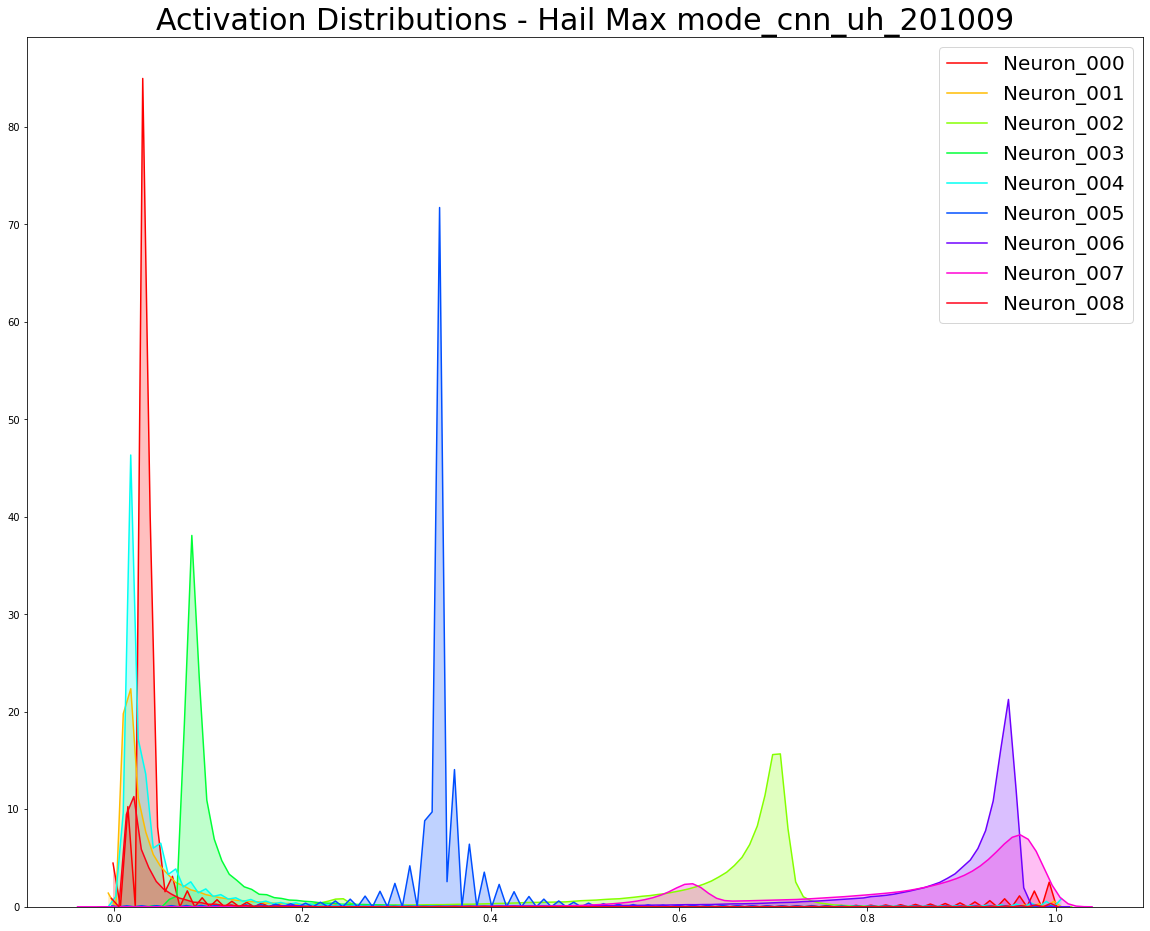

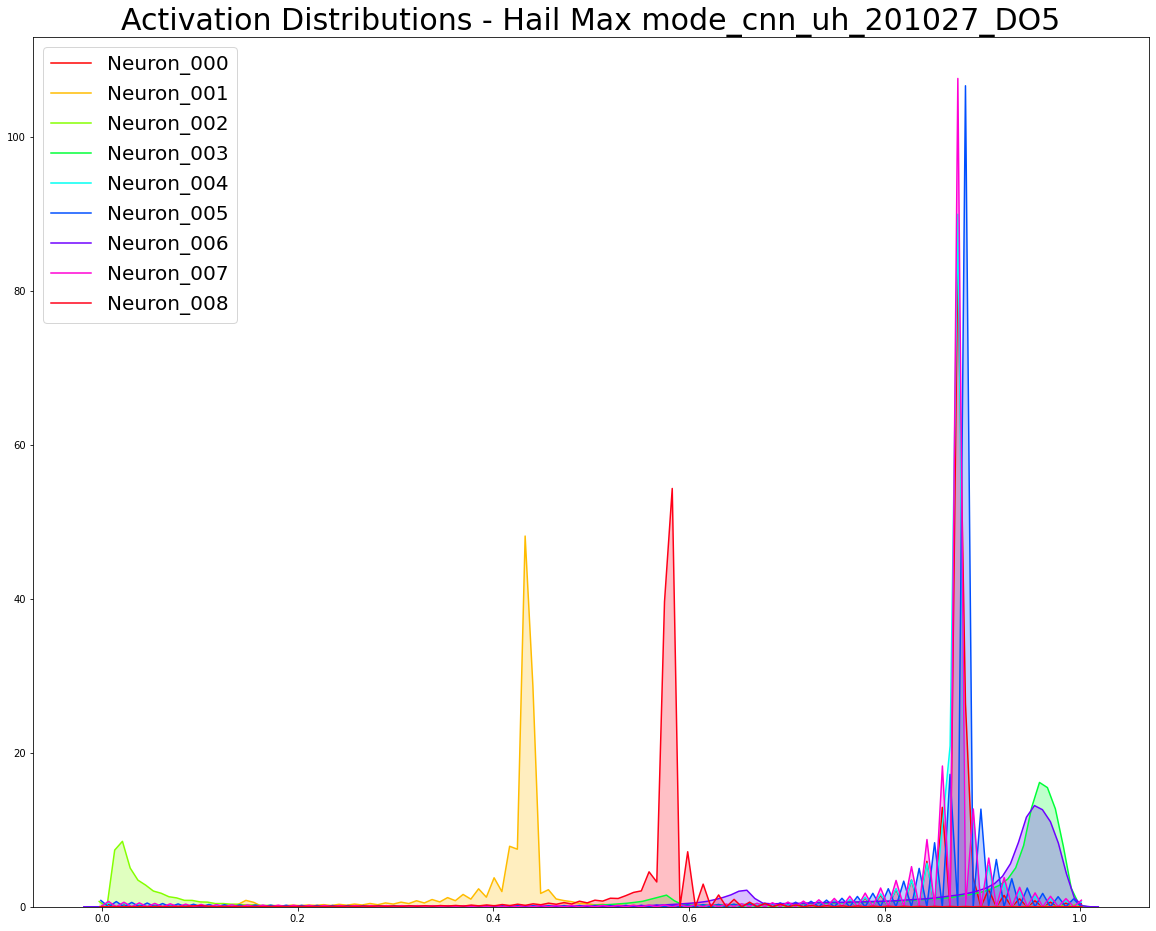

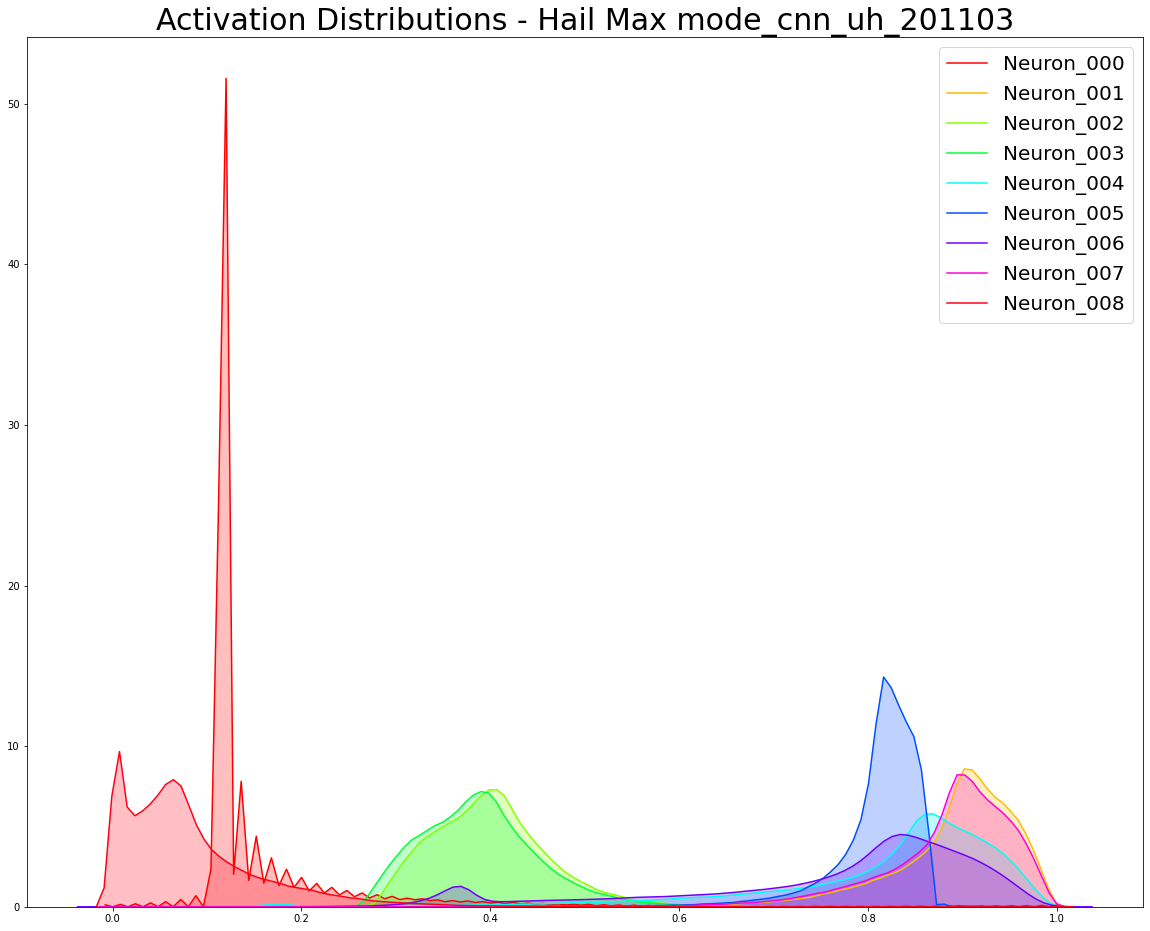

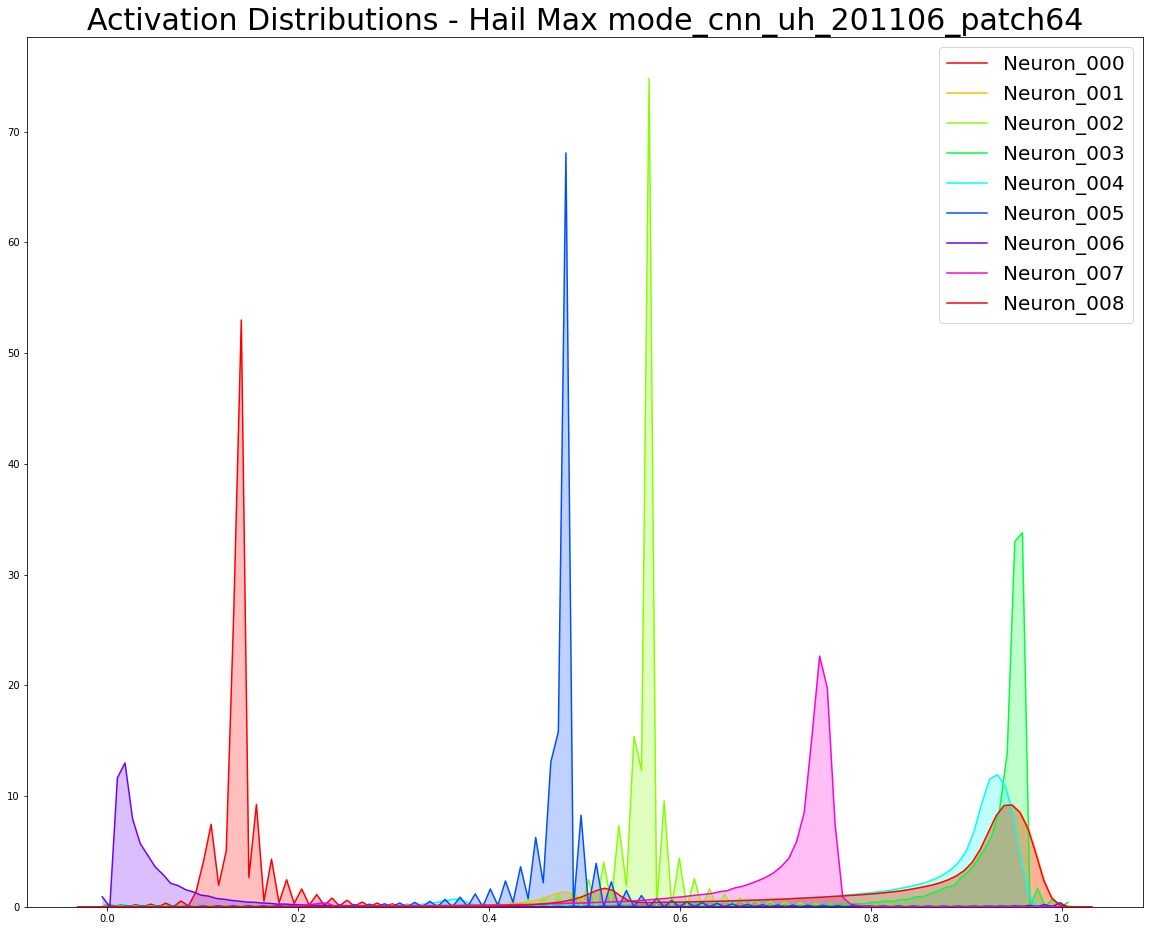

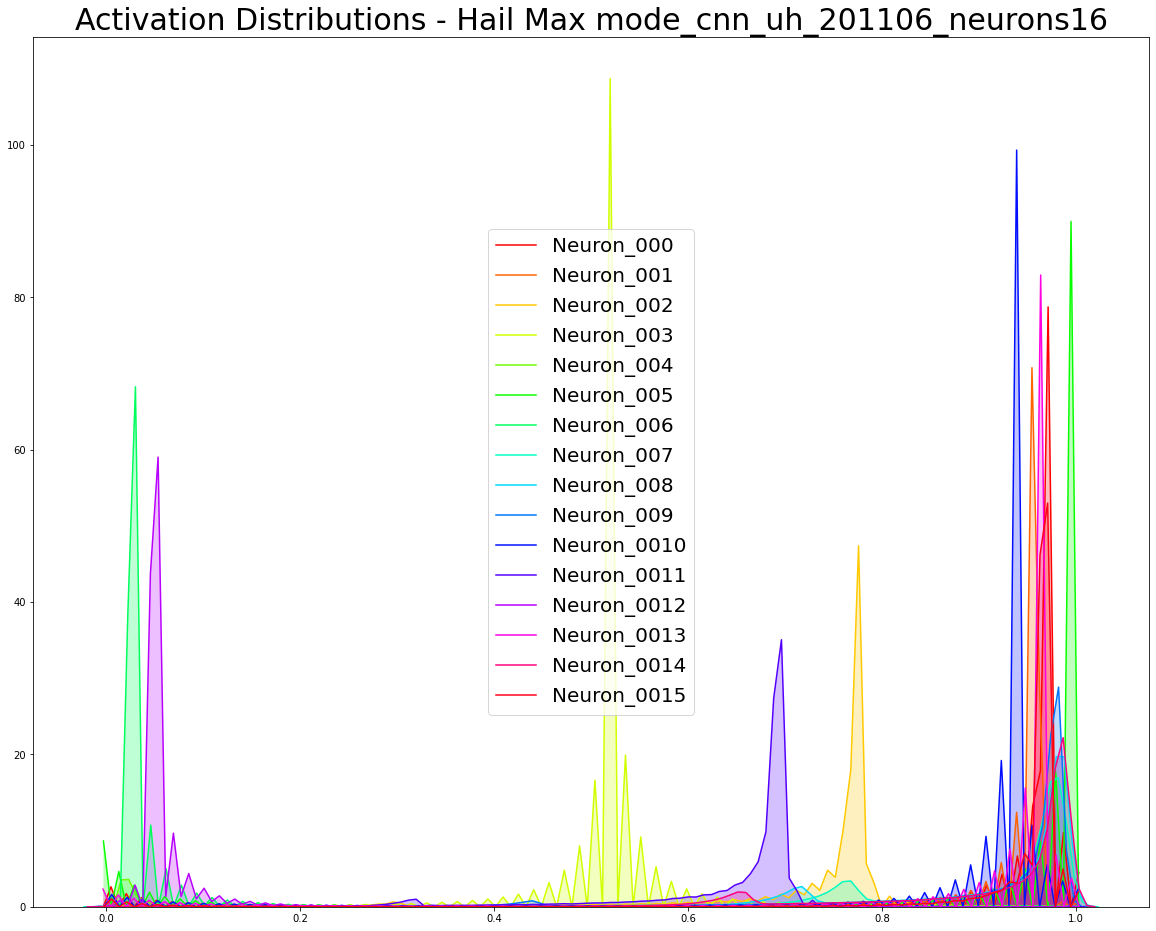

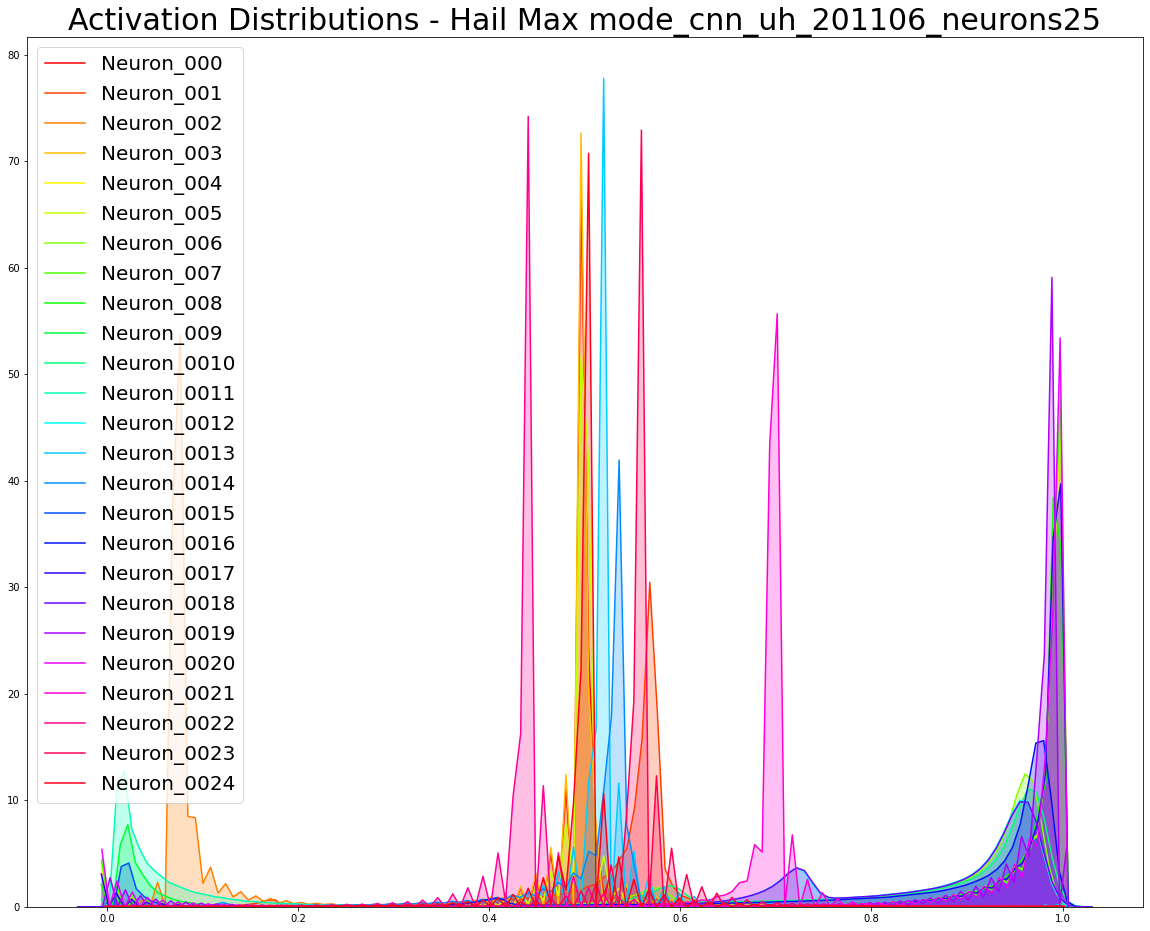

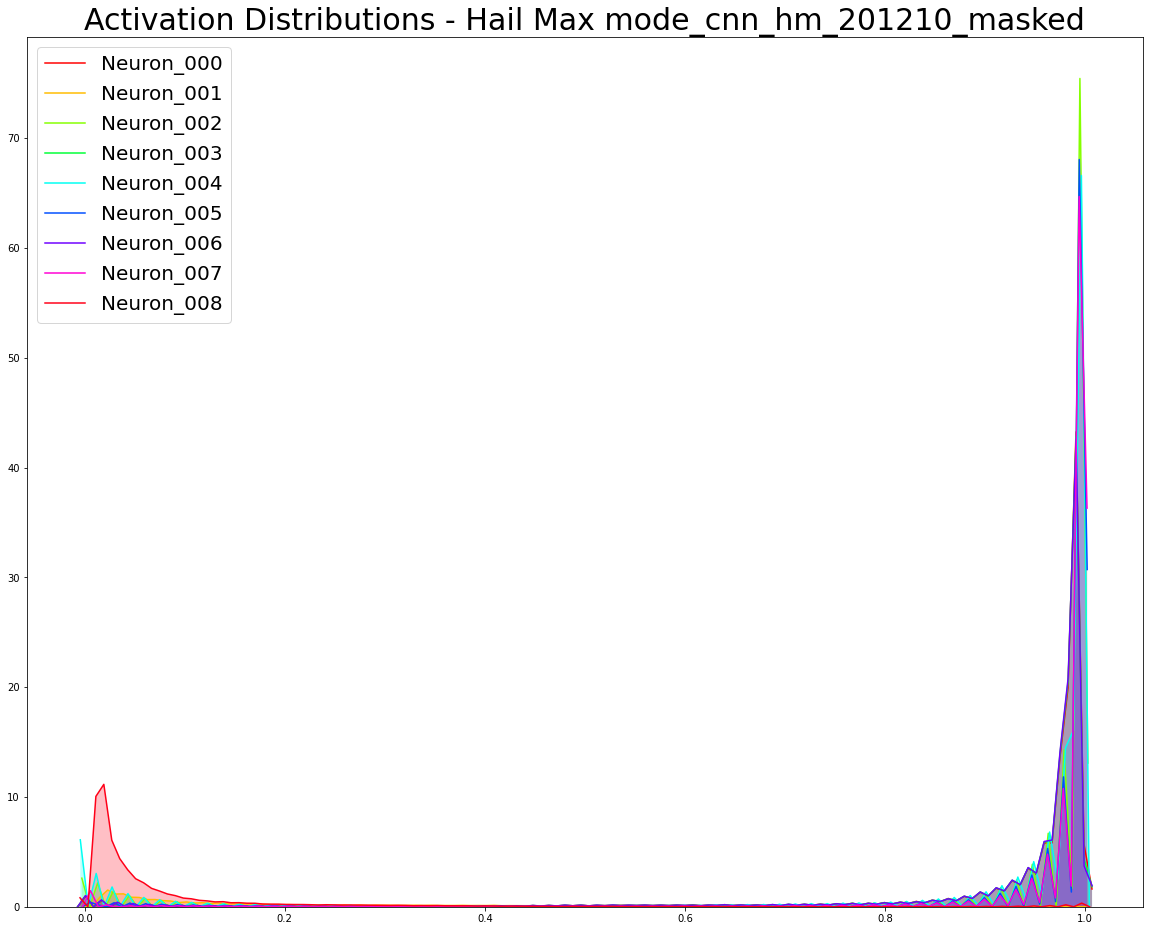

In [5]:
for model in models:
    model_name = model.rsplit('/', 1)[1]
    df = pd.read_csv(model + '/neuron_activations_cnn_20200504_000_val.csv')
    df.time = df.time.astype('datetime64[ns]').reset_index(drop=True) - pd.Timedelta(6, 'H') # convert to datetime64 object and offset from UTC time by 6 hours
    df.describe()
    
    scaler = MinMaxScaler()
    columns = [i for i in df.columns if 'neuron' in i]
    s_data = df.iloc[:, -len(columns):]
    sdf = pd.DataFrame(scaler.fit_transform(s_data), columns=columns)
    cmap = get_cmap(len(columns))

    plt.figure(figsize=(20,16))
    for i in range(len(columns)):
        sns.kdeplot(sdf.iloc[:,i], shade=True, label=f'Neuron_00{i}', color=cmap(i))
        plt.legend(prop={'size': 20})
    plt.ylabel('')
    plt.xlabel('')
    plt.title(f'Activation Distributions - Hail Max {model_name}', fontsize=30)
    plt.savefig(f'../images/{model_name}_kde_dist_uh.png', bbox_inches='tight')
    